# Computational Results

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
resultsSummary = pd.read_pickle('./Data/Performance Data/resultsSummary.pkl')

## SVM models

- SR - Threshold 0 - 10 features
- SR - Threshold 50 - 6 features
- CT - Threshold 2.5 - 10 features
- CT - Threshold 2 - 10 features


In [3]:
def addSVMPerf(folder, perfOut, svmOut): 
    tab1 = pd.read_csv('./Data/Matilda Output/'+folder+'/svm_table.csv')

    perfSummary = pd.DataFrame()
    perfSummary['model'] = [folder]*4
    perfSummary[['row','avg_perf','std_perf','prob_good']] = tab1.iloc[:,0:4]

    svmsummary = pd.DataFrame()
    svmsummary['model'] = [folder] *6
    svmsummary['threshold'] = [folder.split('-')[2]] *6
    svmsummary['row'] = tab1.iloc[:,0]
    svmsummary['row'] = svmsummary['row'].apply(lambda x: x.split('_')[0])
    svmsummary[['accuracy','precision','recall']] = tab1.iloc[:,6:-2]
    svmsummary = svmsummary.query('row != \'Oracle\'')
    svmsummary['f1score'] = svmsummary.apply(lambda x: 2 * x.precision * x.recall/(x.precision + x.recall),axis=1)

    return perfOut.append(perfSummary, ignore_index = True), svmOut.append(svmsummary, ignore_index = True)

In [4]:
sr_PerfSummary = pd.DataFrame()
sr_SVMsummary = pd.DataFrame()

for f in ['SR-10-0','SR-6-50']:
    sr_PerfSummary, sr_SVMsummary = addSVMPerf(f, sr_PerfSummary, sr_SVMsummary)

/tmp/ipykernel_3766576/2160751972.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  svmsummary['f1score'] = svmsummary.apply(lambda x: 2 * x.precision * x.recall/(x.precision + x.recall),axis=1)
/tmp/ipykernel_3766576/2160751972.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return perfOut.append(perfSummary, ignore_index = True), svmOut.append(svmsummary, ignore_index = True)
/tmp/ipykernel_3766576/2160751972.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

In [5]:
ct_PerfSummary = pd.DataFrame()
ct_SVMsummary = pd.DataFrame()

for f in ['CT-10-2','CT-10-2.5']:
    ct_PerfSummary, ct_SVMsummary = addSVMPerf(f, ct_PerfSummary, ct_SVMsummary)

/tmp/ipykernel_3766576/2160751972.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  svmsummary['f1score'] = svmsummary.apply(lambda x: 2 * x.precision * x.recall/(x.precision + x.recall),axis=1)
/tmp/ipykernel_3766576/2160751972.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return perfOut.append(perfSummary, ignore_index = True), svmOut.append(svmsummary, ignore_index = True)
/tmp/ipykernel_3766576/2160751972.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

## Exploratory Data Analysis

In [6]:
EDAplots = resultsSummary[['source','PC1_full','PC2_full',
                           'SA_SR', 'RR_SR', 'RVNS_SR', 'SD_SR']]

EDAplots['Description'] = EDAplots['source'].apply(lambda x: 'Easy' if x in [0,1,2] else 'Hard')

EDAplots['solvedBy'] = EDAplots[['SA_SR', 'RR_SR', 'RVNS_SR', 'SD_SR']
               ].applymap(lambda x: 1 if x > 0 else 0
            ).apply(sum, axis=1)

/tmp/ipykernel_3766576/3905459838.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EDAplots['Description'] = EDAplots['source'].apply(lambda x: 'Easy' if x in [0,1,2] else 'Hard')
/tmp/ipykernel_3766576/3905459838.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EDAplots['solvedBy'] = EDAplots[['SA_SR', 'RR_SR', 'RVNS_SR', 'SD_SR']


In [7]:
print('Number of instances solved at least once by the number of algorithms')
resultsSummary[['SA_SR', 'RR_SR', 'RVNS_SR', 'SD_SR']
               ].applymap(lambda x: 1 if x > 0 else 0
            ).apply(sum, axis=1).value_counts()

Number of instances solved at least once by the number of algorithms


0    346
1    230
4    175
2    126
3    123
dtype: int64

[Text(0.5, 0, 'PC1'), Text(0, 0.5, 'PC2'), Text(0.5, 1.0, '(b)')]

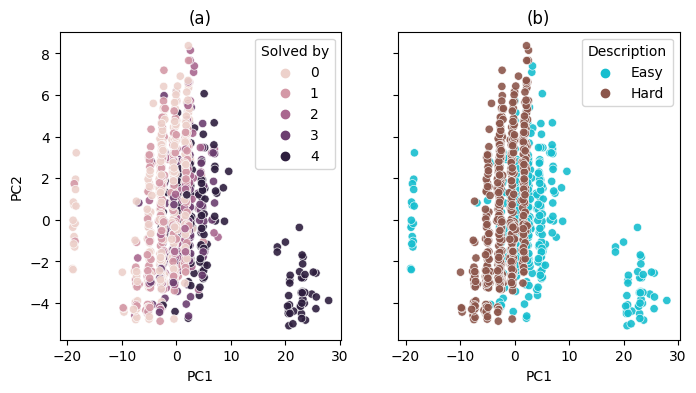

In [8]:
# Fig. 3 - instance scatterplots 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharey=True)

#plt.subplot(1,2,1)
sns.scatterplot(x='PC1_full',y='PC2_full',hue='solvedBy', data=EDAplots, 
    alpha=0.9, ax=ax1)
ax1.legend(title='Solved by') 

#plt.subplot(1,2,2)
sns.scatterplot(x='PC1_full',y='PC2_full',hue='Description', data=EDAplots, 
    alpha=0.9, ax=ax2, palette={'Easy':'tab:cyan','Hard':'tab:brown'})

ax1.set(xlabel='PC1',ylabel='PC2',title='(a)')
ax2.set(xlabel='PC1',ylabel='PC2',title='(b)')
#plt.savefig('./instance source plot.pdf',bbox_inches='tight') 

In [9]:
# Table 1 - SR Prob

SR_prob = {str.replace(a,'_SR',''): [len([i for i in resultsSummary[a] if i > sr])/1000 for sr in [0,0.25,0.5,0.99]] for a in ['SA_SR', 'RR_SR', 'RVNS_SR', 'SD_SR']}

SR_prob = pd.DataFrame.from_dict(SR_prob,orient='index',columns=['0','0.25','0.5','1'])
SR_prob.insert(0,'Mean', 
resultsSummary[['SA_SR', 'RR_SR', 'RVNS_SR', 'SD_SR']].describe().loc['mean'].values)

SR_prob.transpose()
#print(SR_prob.transpose().to_latex(float_format="%.3f"))

,SA,RR,RVNS,SD
Mean,0.08815,0.08595,0.0621,0.05815
0,0.43800,0.44200,0.3450,0.32600
0.25,0.06300,0.06100,0.0440,0.04300
0.5,0.04100,0.04100,0.0410,0.03900
1,0.04100,0.03800,0.0220,0.01100


In [10]:
# Table 2 - CT Prob
ct_thr = [3,2.5,2,1.5,1]

CT_prob = {str.replace(a,'_meanCT',''): [len([i for i in resultsSummary[a] if i < sr])/1000 for sr in ct_thr] for a in ['SA_meanCT', 'RR_meanCT', 'RVNS_meanCT', 'SD_meanCT']}

CT_prob = pd.DataFrame.from_dict(CT_prob,orient='index',columns=ct_thr)
CT_prob.insert(0,'Max', 
resultsSummary[['SA_meanCT', 'RR_meanCT', 'RVNS_meanCT', 'SD_meanCT']].describe().loc['max'].values)

CT_prob.insert(0,'Mean', 
resultsSummary[['SA_meanCT', 'RR_meanCT', 'RVNS_meanCT', 'SD_meanCT']].describe().loc['mean'].values)

CT_prob.transpose()
#print(CT_prob.transpose().to_latex(float_format="%.3f"))

,SA,RR,RVNS,SD
Mean,2.201569,2.084878,2.679376,2.775323
Max,3.462554,3.209921,4.155690,4.619463
3.0,0.991000,0.998000,0.762000,0.667000
2.5,0.873000,0.962000,0.275000,0.197000
2.0,0.127000,0.162000,0.046000,0.044000
1.5,0.043000,0.043000,0.040000,0.038000
1.0,0.041000,0.041000,0.036000,0.036000


[Text(0, 0.5, 'Mean CT')]

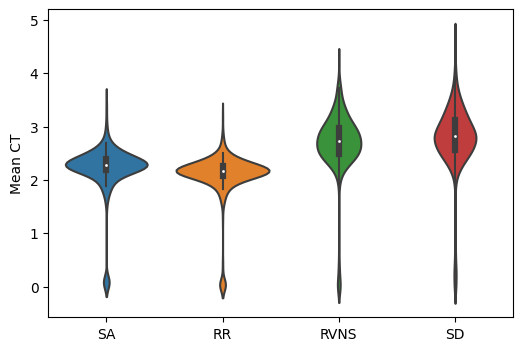

In [11]:
# Fig 4 - violin plot of mean CT
plt.figure(figsize=(6,4))
vp = sns.violinplot(order=['SA','RR','RVNS','SD'],
    data=resultsSummary[['RR_meanCT','RVNS_meanCT','SA_meanCT',   'SD_meanCT']].rename(columns=lambda x:str.removesuffix(x,'_meanCT'))
    )

vp.set(ylabel='Mean CT')
#plt.savefig('./CT voilin.pdf',bbox_inches='tight') 

## Predicting Performance

In [12]:
#plot summary of SVM summary - selected models
sel = ['SR-10-0','SR-6-50','CT-10-2.5','CT-10-2']
thrMap = {'0':'SR > 0', '50':'SR > 0.5','2':'CT < 2','2.5':'CT < 2.5'}

selectedModels = pd.concat([sr_SVMsummary.query('model in @sel'),
                            ct_SVMsummary.query('model in @sel')])
selectedModels['Threshold'] = selectedModels['threshold'].apply(
    lambda x: thrMap[x])


Text(0.5, 0, '')

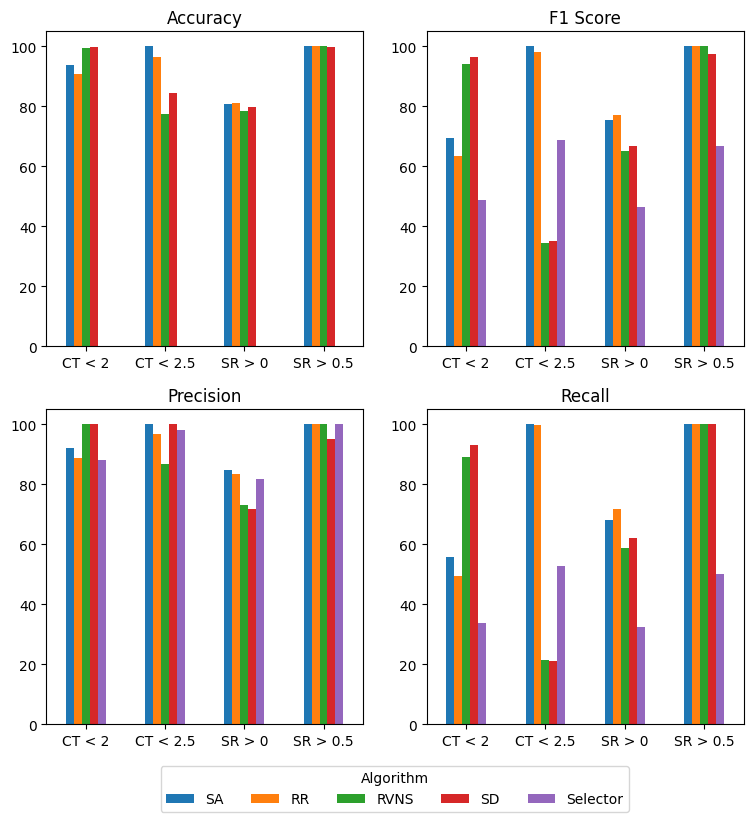

In [13]:
# Fig 5 - SVM model statistics
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(9, 9))#, sharey=True, sharex=True)

selectedModels.pivot(index='Threshold',columns='row',values='accuracy')[['SA',  'RR', 'RVNS','SD', 'Selector']
    ].plot.bar(ax=axes[0,0],title='Accuracy',legend=0, rot=0)
axes[0,0].set_xlabel('')
selectedModels.pivot(index='Threshold',columns='row',values='f1score')[['SA',  'RR', 'RVNS','SD', 'Selector']
    ].plot.bar(ax=axes[0,1],title='F1 Score',legend=0, rot=0)
axes[0,1].set_xlabel('')
selectedModels.pivot(index='Threshold',columns='row',values='precision')[['SA',  'RR', 'RVNS','SD', 'Selector']
    ].plot.bar(ax=axes[1,0],title='Precision',legend=0, rot=0)
axes[1,0].set_xlabel('')
selectedModels.pivot(index='Threshold',columns='row',values='recall')[['SA',  'RR', 'RVNS','SD', 'Selector']
    ].plot.bar(ax=axes[1,1],title='Recall', rot=0)

axes[1,1].legend(title='Algorithm',loc='lower center',ncol=5,bbox_to_anchor=(-0.1, -0.3))
#axes[0,0].legend(title='',loc='lower center', ncol=2, bbox_to_anchor=(0.5, 1.1))

axes[1,1].set_xlabel('')

#plt.savefig('./selected models svm table (no ST).pdf',bbox_inches='tight') 

In [14]:
def SelectedPlots(folder, thr):
    coords = pd.read_csv('./Data/Matilda Output/'+folder+'/coordinates.csv', index_col=0)
    coords.rename(columns={'z_1':'Z1','z_2':'Z2'}, inplace=True)

    best = pd.read_csv('./Data/Matilda Output/'+folder+'/portfolio_svm.csv', index_col=0)
    bc = best['Best_Algorithm'].value_counts()
    algs = ['None','SA','RR','RVNS','SD']
    best['best_Algorithm'] = best['Best_Algorithm'].apply(lambda x: algs[x])    
    best['Counts'] = best['Best_Algorithm'].apply(lambda x: algs[x]+ ' ('+ str(bc[x]) +')')
    
    modTab = pd.concat([coords,best],axis=1)

    colours = ['tab:grey','tab:blue','tab:orange','tab:green','tab:red']
    colourDict = {algs[x]+ ' ('+ str(bc[x]) +')':colours[x] for x in bc.index}

    sns.scatterplot(x='Z1',y='Z2',hue='Counts',data=modTab,legend=1, 
                    alpha=0.7, palette=colourDict
        ).set(title=thr)
    plt.legend(title='Selected Algorithm', ncol=2, loc='upper center',bbox_to_anchor=(0.5, -0.15))

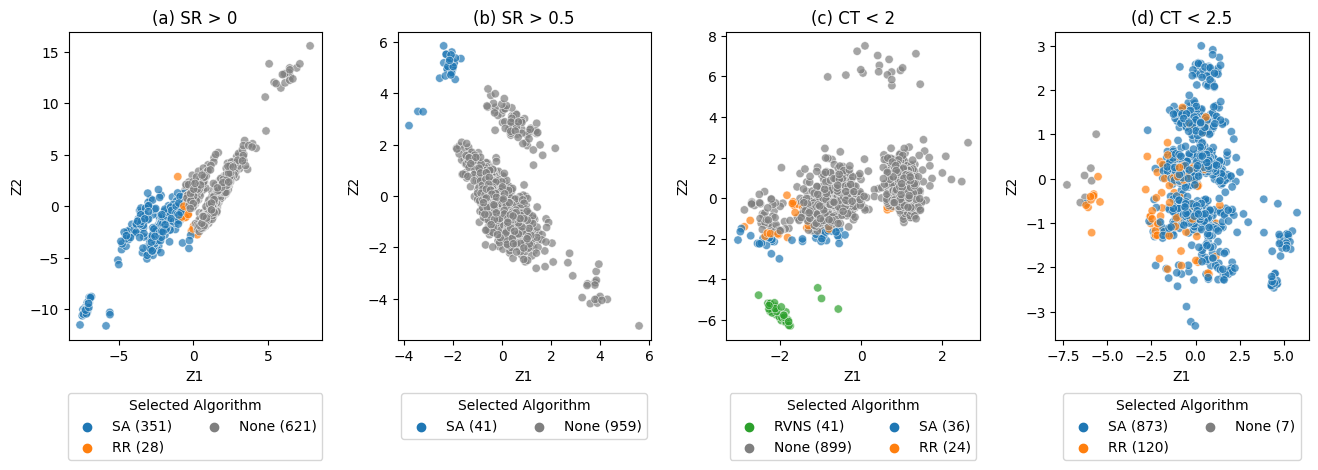

In [15]:
# Fig 6 - best algorithm
plt.figure(figsize=(16,4))

plt.subplot(1,4,1)
SelectedPlots('SR-10-0','(a) SR > 0')

plt.subplot(1,4,2)
SelectedPlots('SR-6-50','(b) SR > 0.5')

plt.subplot(1,4,3)
SelectedPlots('CT-10-2','(c) CT < 2')

plt.subplot(1,4,4)
SelectedPlots('CT-10-2.5','(d) CT < 2.5')

plt.subplots_adjust(wspace=0.3)

#plt.savefig('./selected algs.pdf',bbox_inches='tight') 

## Understanding Performance

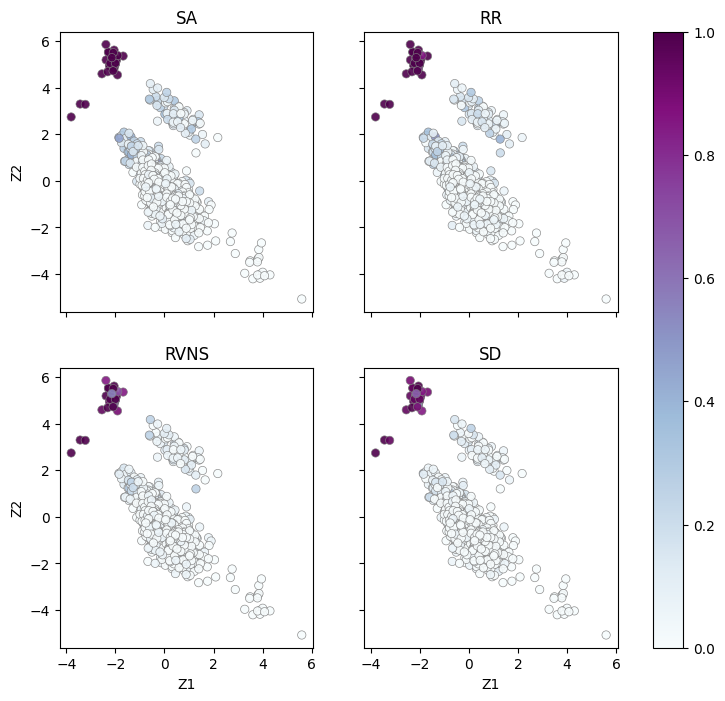

In [16]:
# Fig 7 - success rates (PILOT)
folder = 'SR-6-50'
p = '_SR'

coords = pd.read_csv('./Data/Matilda Output/'+folder+'/coordinates.csv', index_col=0)
coords.rename(columns={'z_1':'Z1','z_2':'Z2'}, inplace=True)

perf = pd.read_csv('./Data/Matilda Output/'+folder+'/algorithm_raw.csv',index_col=0)

plotData = pd.concat([coords,perf],axis=1)

#plt.figure(figsize=(9,9))
fig, axs = plt.subplots(2, 2, figsize=(9, 8), sharex=True, sharey=True)


    #plt.subplot(2,2,i+1)
sns.scatterplot(data=plotData,x='Z1',y='Z2',hue='SA'+p,
                alpha=0.9, edgecolor='grey', palette='BuPu',
                legend=False, ax=axs[0,0])
axs[0,0].set(title='SA')

sns.scatterplot(data=plotData,x='Z1',y='Z2',hue='RR'+p,
                alpha=0.9, edgecolor='grey', palette='BuPu',
                legend=False, ax=axs[0,1])
axs[0,1].set(title='RR')

sns.scatterplot(data=plotData,x='Z1',y='Z2',hue='RVNS'+p,
                alpha=0.9, edgecolor='grey', palette='BuPu',
                legend=False, ax=axs[1,0])
axs[1,0].set(title='RVNS')

sns.scatterplot(data=plotData,x='Z1',y='Z2',hue='SD'+p,
                alpha=0.9, edgecolor='grey', palette='BuPu',
                legend=False, ax=axs[1,1])
axs[1,1].set(title='SD')

norm = plt.Normalize(0, 1)
sm = plt.cm.ScalarMappable(cmap='BuPu', norm=norm)
sm.set_array([])
plt.colorbar(sm, ax=axs)

#plt.savefig('./Plots/SR instance plot.pdf',bbox_inches='tight') 

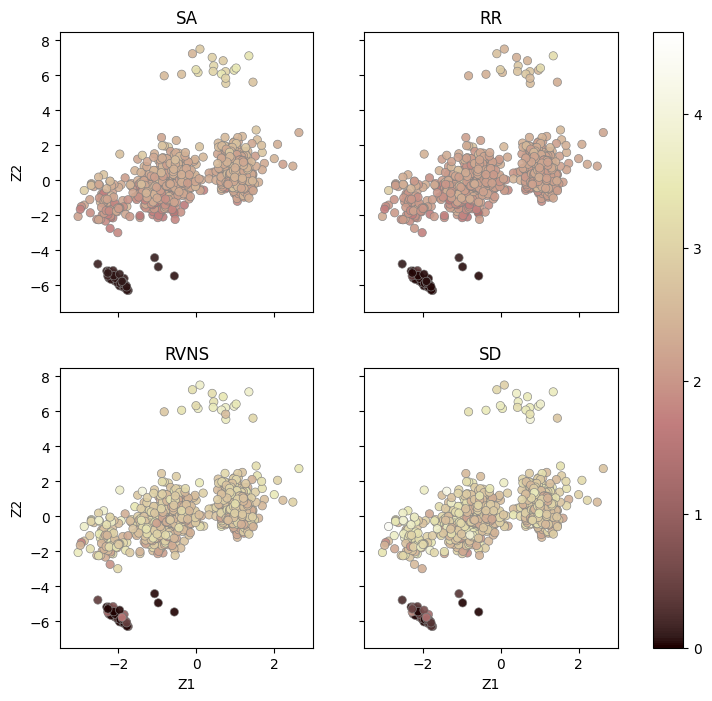

In [17]:
# mean CT instances (PILOT)

folder = 'CT-10-2'
p = '_meanCT'

coords = pd.read_csv('./Data/Matilda Output/'+folder+'/coordinates.csv', index_col=0)
coords.rename(columns={'z_1':'Z1','z_2':'Z2'}, inplace=True)

perf = pd.read_csv('./Data/Matilda Output/'+folder+'/algorithm_raw.csv',index_col=0)

plotData = pd.concat([coords,perf],axis=1)

CT_ends = pd.DataFrame({'Z1':[-10,-10], 'Z2':[-10,-10], 
                        'SA_meanCT':[0,4.62], 'RR_meanCT':[0,4.62], 
                        'RVNS_meanCT':[0,4.62], 'SD_meanCT':[0,4.62]})

plotData = pd.concat([plotData,CT_ends], ignore_index=True)

leg = False

#plt.figure(figsize=(9,9))
fig, axs = plt.subplots(2, 2, figsize=(9, 8), sharex=True, sharey=True)


    #plt.subplot(2,2,i+1)
sns.scatterplot(data=plotData,x='Z1',y='Z2',hue='SA'+p,
                alpha=0.9, edgecolor='grey', palette='pink',
                legend=leg, ax=axs[0,0])
axs[0,0].set(title='SA')

sns.scatterplot(data=plotData,x='Z1',y='Z2',hue='RR'+p,
                alpha=0.9, edgecolor='grey', palette='pink',
                legend=leg, ax=axs[0,1])
axs[0,1].set(title='RR')

sns.scatterplot(data=plotData,x='Z1',y='Z2',hue='RVNS'+p,
                alpha=0.9, edgecolor='grey', palette='pink',
                legend=leg, ax=axs[1,0])
axs[1,0].set(title='RVNS')

sns.scatterplot(data=plotData,x='Z1',y='Z2',hue='SD'+p,
                alpha=0.9, edgecolor='grey', palette='pink',
                legend=leg, ax=axs[1,1])
axs[1,1].set(title='SD')

for (i,j) in [(0,0),(0,1),(1,0),(1,1)]:
    axs[i,j].set_xlim([-3.5,3])
    axs[i,j].set_ylim([-7.5,8.5])

norm = plt.Normalize(0, 4.62)
sm = plt.cm.ScalarMappable(cmap='pink', norm=norm)
sm.set_array([])
plt.colorbar(sm, ax=axs)

#plt.savefig('./Plots/CT instance plot.pdf',bbox_inches='tight') 

### Selected Features

In [18]:
def addFeatures(fDict, folder):
    file1 = open('./Data/Matilda Output/'+folder+'/projection_matrix.csv')
    features = file1.readline().strip('\n').split(',')
    features.remove('Row')
    features.sort(key=str.lower)
    
    fDict[folder] = features

In [19]:
selectedFeatures = dict()

sel = ['SR-10-0','SR-6-50','CT-10-2.5','CT-10-2']
for f in sel:
    addFeatures(selectedFeatures,f)

# printing selected features
for (k,v) in selectedFeatures.items():
    print(k)
    print(v)

SR-10-0
['counts_min', 'counts_naked1', 'counts_naked2', 'counts_naked3', 'GCP_avgPath', 'GCP_clustcoef', 'LP_fracInt', 'LPslack_entropy', 'SAT_ratioLin', 'SAT_ratioRec']
SR-6-50
['counts_CV', 'counts_naked1', 'LP_fracInt', 'LPslack_entropy', 'SAT_ratioRec', 'VG_CV']
CT-10-2.5
['counts_min', 'counts_naked1', 'counts_naked2', 'fixedDig_max', 'GCP_density', 'LP_fracInt', 'LPslack_CV', 'value_max', 'value_mean', 'value_min']
CT-10-2
['counts_min', 'counts_naked1', 'counts_naked2', 'GCP_density', 'GCP_nDeg_std', 'LP_fracInt', 'LPslack_CV', 'value_max', 'value_mean', 'value_min']
